In [ ]:
! mkdir -p ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! kaggle datasets download -d ciplab/real-and-fake-face-detection

 97% 417M/431M [00:07<00:00, 44.0MB/s]
100% 431M/431M [00:07<00:00, 63.5MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/real-and-fake-face-detection.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
# LIBRARY IMPLEMENTATION
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import zipfile
import time
import math
import warnings
from sklearn import *
import datetime
import  plotly.animation
import tensorboard
import torch
import torch.nn as nn
from torch import tensor
import pytensor
import random
import os
import cv2
import tensorflow as tf
from tensorflow import keras
import keras
import librosa
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,Adagrad
from google.colab.patches import cv2_imshow

In [ ]:
train_data_dir = "/content/real_and_fake_face_detection/real_and_fake_face"

In [ ]:
real = "/content/real_and_fake_face_detection/real_and_fake_face/training_real"

In [ ]:
fake = "/content/real_and_fake_face_detection/real_and_fake_face/training_fake"

In [ ]:
real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [ ]:
def load_img(path):

  image = cv2.imread(path)
  image = cv2.resize(image,(224,224))

  return image[...,::-1]

# ***PLOT SOME REA AND FAKE IMAGES***

In [ ]:
plt.figure(figsize=(14,4))

for i in range(16):
  plt.subplot(4,4,i+1)
  plt.imshow(load_img(real_path[i]),cmap='gray')
  plt.subtitle("Real_faces",fontsize=20)
  plt.axis('off')
plt.show()

(32, 224, 224, 1) (32, 2)


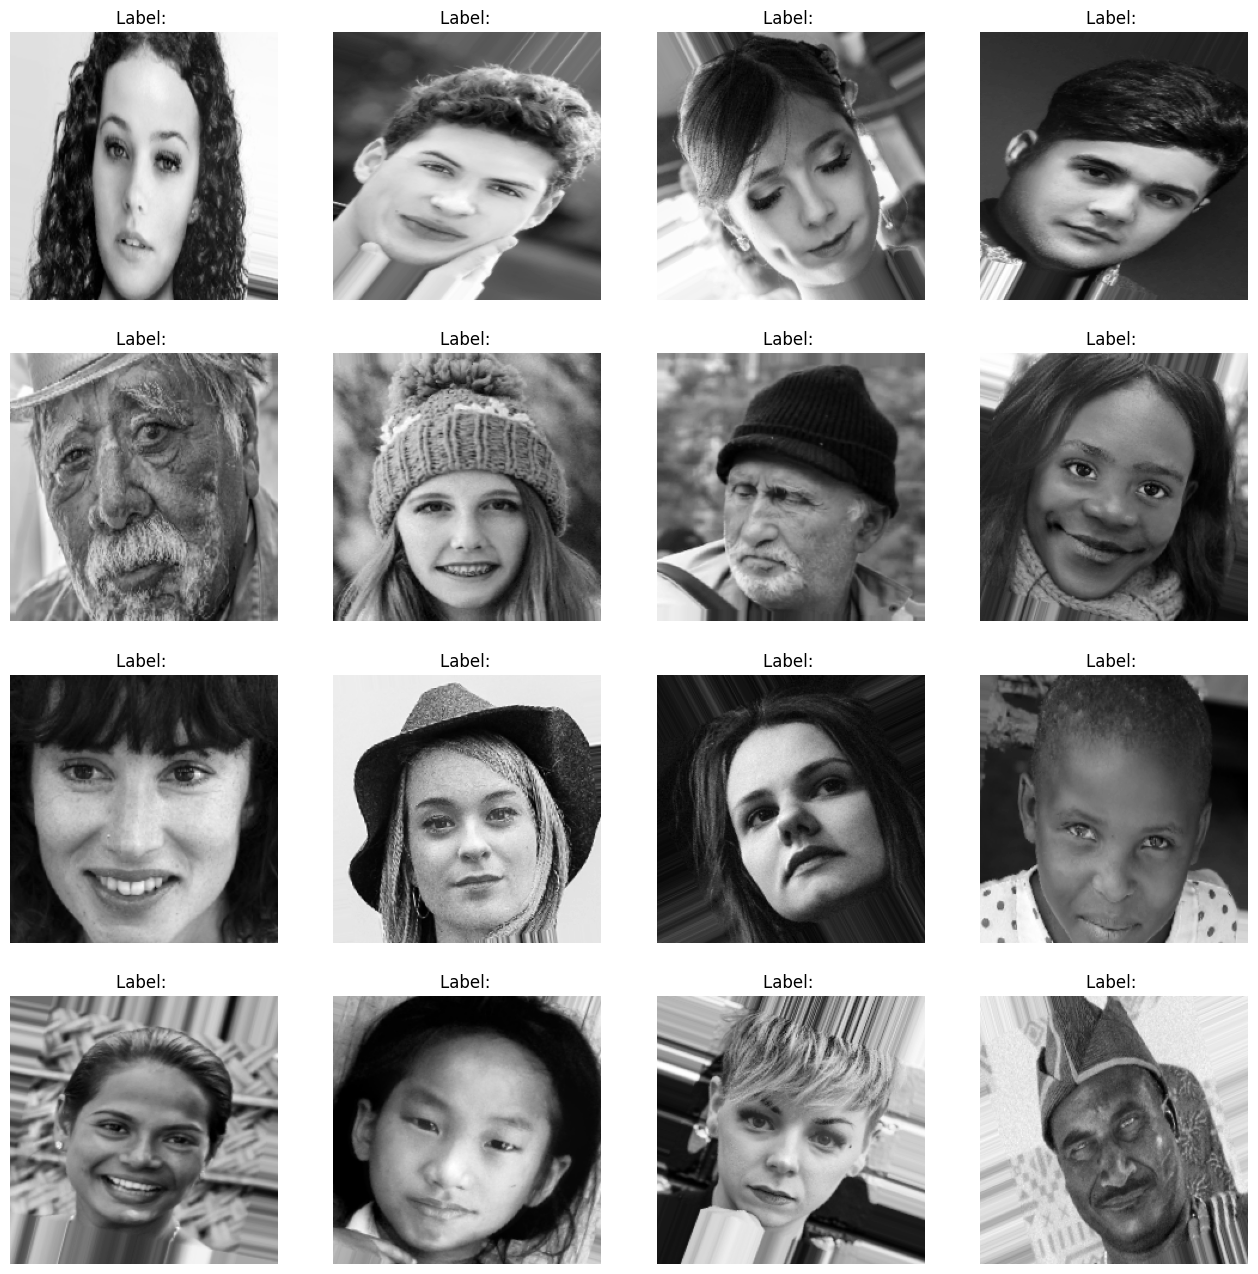

In [ ]:
for X, y in train_generator:
    print(X.shape, y.shape)
    plt.figure(figsize=(16,16))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.axis('off')
        plt.title('Label: ')
        img = np.uint8(255*X[i,:,:,0])
        plt.imshow(img, cmap='gray')
    break

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    zoom_range = 0.3,
    shear_range = 0.3,
    horizontal_flip = True,
    fill_mode=  'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (224,224),
    batch_size = 32,
    color_mode="grayscale",
    class_mode = "categorical",
    shuffle = True
)

Found 2041 images belonging to 2 classes.


In [ ]:
class_label = ['fake','real']

In [ ]:
img,labels = train_generator.__next__()

In [ ]:
print(img)

[[[[0.5754392 ]
   [0.5758714 ]
   [0.5704107 ]
   ...
   [0.29682568]
   [0.32121983]
   [0.3441212 ]]

  [[0.573306  ]
   [0.5762042 ]
   [0.57617164]
   ...
   [0.31238374]
   [0.32919964]
   [0.347134  ]]

  [[0.56740236]
   [0.5647058 ]
   [0.5644553 ]
   ...
   [0.30174708]
   [0.33120438]
   [0.35215253]]

  ...

  [[0.63032126]
   [0.6185378 ]
   [0.6218239 ]
   ...
   [0.5559842 ]
   [0.56683016]
   [0.5706399 ]]

  [[0.5951522 ]
   [0.61447257]
   [0.61309385]
   ...
   [0.54914504]
   [0.54512703]
   [0.54303515]]

  [[0.5965435 ]
   [0.63471454]
   [0.64651257]
   ...
   [0.5432806 ]
   [0.53330654]
   [0.5326552 ]]]


 [[[0.27310756]
   [0.30123937]
   [0.38847956]
   ...
   [0.27681845]
   [0.2694724 ]
   [0.2624357 ]]

  [[0.27389607]
   [0.3034198 ]
   [0.41249093]
   ...
   [0.2755727 ]
   [0.26886922]
   [0.26238433]]

  [[0.2729822 ]
   [0.30083472]
   [0.40302593]
   ...
   [0.2705612 ]
   [0.26647466]
   [0.26217726]]

  ...

  [[0.17353268]
   [0.15603596]
   [0.1

In [ ]:
# Create a cnn model


model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,1)))
model.add(Dropout(0.01))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.01))


model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.01))


model.add(Conv2D(256,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.01))



model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dense(2,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      320       
                                                                 
 dropout_4 (Dropout)         (None, 222, 222, 32)      0         
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 110, 110, 64)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 128)     73856     
                                                      

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
train_path = "/content/real_and_fake_face_detection/real_and_fake_face"

In [ ]:
num_train_imgs = 0

for root,dirs,files in os.walk(train_path):
  num_train_imgs+=len(files)


In [ ]:
history=model.fit(train_generator,steps_per_epoch=num_train_imgs//32,epochs=100)

Epoch 1/100
63/63 [==============================] - 47s 497ms/step - loss: 0.8339 - accuracy: 0.5207
Epoch 2/100
63/63 [==============================] - 29s 457ms/step - loss: 0.6935 - accuracy: 0.5236
Epoch 3/100
63/63 [==============================] - 30s 473ms/step - loss: 0.6921 - accuracy: 0.5276
Epoch 4/100
63/63 [==============================] - 29s 452ms/step - loss: 0.6917 - accuracy: 0.5286
Epoch 5/100
63/63 [==============================] - 29s 454ms/step - loss: 0.6915 - accuracy: 0.5291
Epoch 6/100
63/63 [==============================] - 29s 455ms/step - loss: 0.6918 - accuracy: 0.5291
Epoch 7/100
63/63 [==============================] - 29s 457ms/step - loss: 0.6922 - accuracy: 0.5261
Epoch 8/100
63/63 [==============================] - 29s 451ms/step - loss: 0.6916 - accuracy: 0.5296
Epoch 9/100
63/63 [==============================] - 29s 456ms/step - loss: 0.6916 - accuracy: 0.5291
Epoch 10/100
63/63 [==============================] - 29s 454ms/step - loss: 0.691

<Axes: >

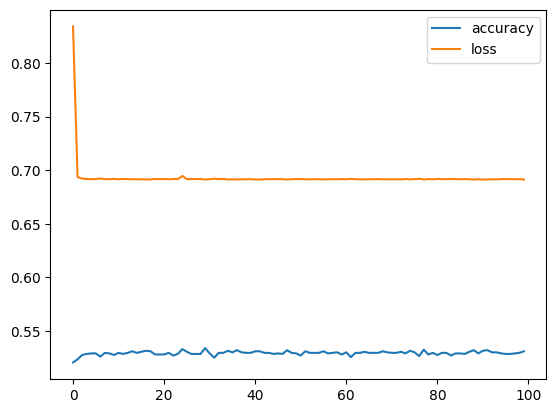

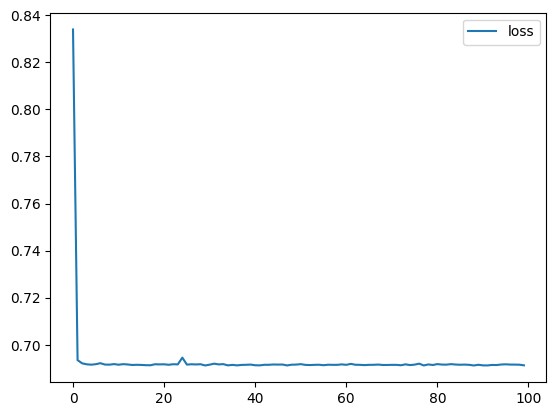

In [ ]:
history_df = pd.DataFrame(history.history)
#plt.title("Accuracy and Losses Plot For Our Deep Fake Images")
history_df.loc[:,['accuracy','loss']].plot()
history_df.loc[:,['loss']].plot()

1/1 [==============================] - 0s 22ms/step
1


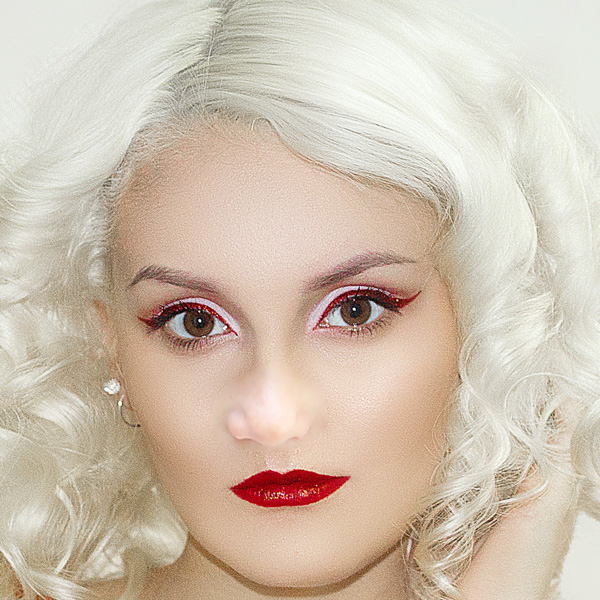

In [ ]:


frame = cv2.imread("/content/real_and_fake_face_detection/real_and_fake_face/training_fake/easy_115_0010.jpg")
#gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
labels_dict = {0:'training_fake',1:'training_real'}
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray,(224,224))
normalize = resized/255.0
reshaped = np.reshape(normalize,(1,224,224,1))
result = model.predict(reshaped)
label = np.argmax(result,axis=1)[0]
print(label)
cv2_imshow(frame)

1/1 [==============================] - 0s 70ms/step
0
Fake Image Is Seen In Picture


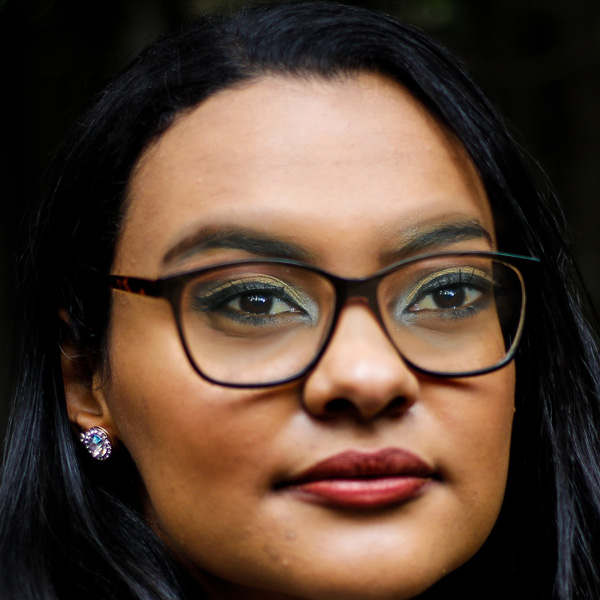

In [ ]:


frame = cv2.imread("/content/real_and_fake_face/training_fake/easy_154_1100.jpg")
#gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
labels_dict = {0:'training_fake',1:'training_real'}
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray,(224,224))
normalize = resized/255.0
reshaped = np.reshape(normalize,(1,224,224,1))
result = model.predict(reshaped)
label = np.argmax(result,axis=1)[0]
print(label)
if (label==0):
  print("Fake Image Is Seen In Picture")
if(label==1):
  print("Real Image Is Seen In Picture")
cv2_imshow(frame)